# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
# Импортирую библиотеки в отдельной ячейке
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   

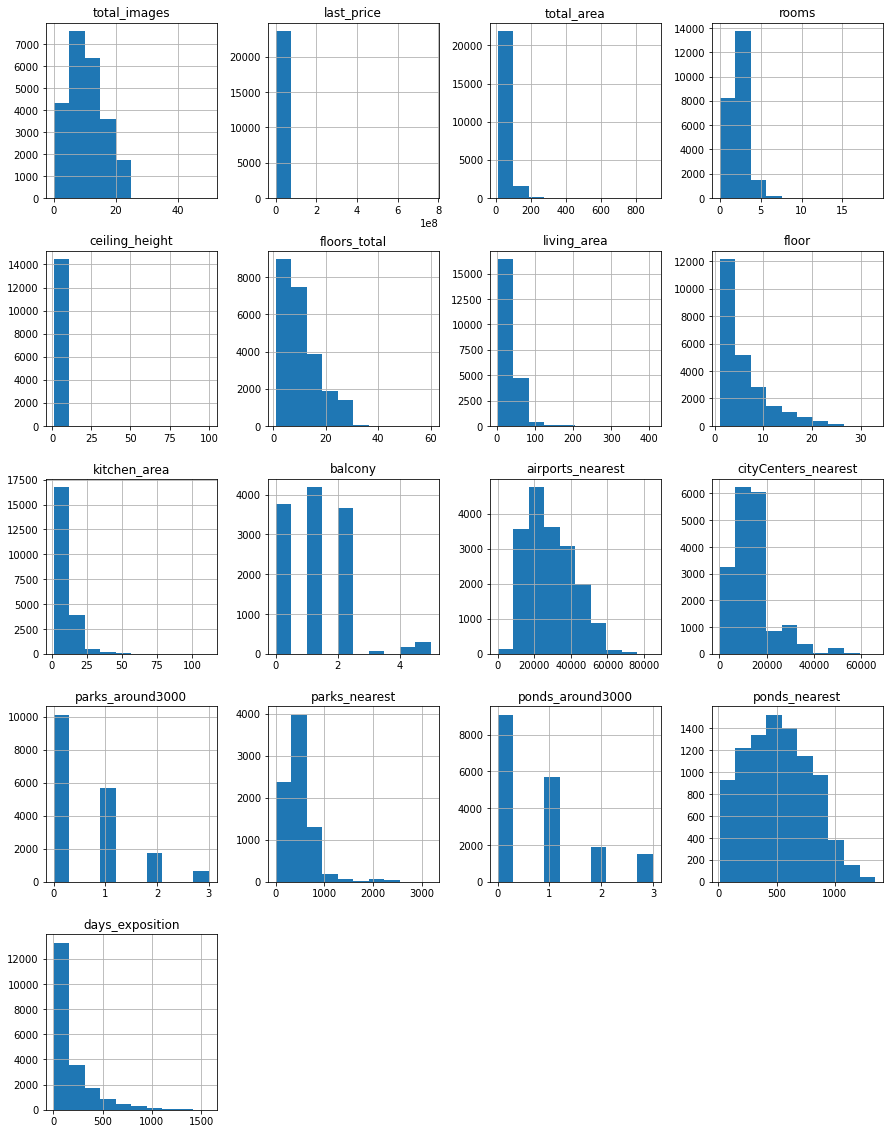

In [2]:
# После выведения первых 10 строк видим что данные склеились, следовательно разделяем знаком табуляции
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(data.head(10))
print(data.info())

# По информации видно что датафрейм имеет пропуски
# Строим гистограммы
data.hist(figsize=(15, 20));

In [3]:
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Были обнаружены пропущенные значения в столбцах living_area, kitchen_area, locality_name, airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest и days_exposition. Пропуски в этих данных могут повлиять на точность исследования, и их обработка может потребоваться для дальнейшего анализа. Столбец first_day_exposition имеет тип данных datetime64, что является корректным для работы с датами. Однако, стоит убедиться, что все операции с датами выполняются корректно.Были выявлены выбросы и аномалии в таких параметрах, как ceiling_height, rooms и last_price. Некоторые значения кажутся необычно высокими или низкими и могут потребовать дополнительного исследования. Отсутствуют явные дубликаты в данных, но стоит проверить уникальные номера объектов недвижимости на возможные дубликаты для точности анализа." В столбце balcony обнаружены значения вещественного типа, хотя они представляют собой категориальную переменную (количество балконов). Следует привести этот столбец к целочисленному типу данных.
Для дальнейшего анализа необходимо провести предобработку данных, включая обработку пропусков, работу с выбросами и аномалиями, а также проверку типов данных для обеспечения корректности исследования.

### Выполните предобработку данных

In [4]:
# Проверяем пропуски и их количество
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Всего мы видим пропуски в 14 столбцах. В таких столбцах как 'balcony', 'parks_around3000', 'ponds_around3000' пропускные значения мы заменим на 0, так как скорее всего, если они не указаны значит их нет. Судя по первым строкам столбца 'ceiling_height' там нет значительных выбросов значит вместо пропусков я использую среднее значение. Для столбца 'floors_total' я буду использовать медиану, так как количество пропущенных значений невелико и распределение этого столбца не слишком искажено выбросами. Пропуски в столбцах 'locality_name', 'days_exposition', 'living_area' и 'kitchen_area' я пропущу. Для стобцов 'living_area' и 'kitchen_area' пропуски я пропущу, потому что есть риск, заполнив их медианами/средними и т.п., исказить дальнейшие выводы о стоимости квадратного метра в тех или иных районах. Пропуски в таких столбцах как 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest' я также пропущу, так как это может внести искажение в анализ.

In [5]:
# Замена пропущенных значений на 0
columns_to_zero = ['balcony', 'parks_around3000', 'ponds_around3000']

data[columns_to_zero] = data[columns_to_zero].fillna(0)

Я задумалась перед выбором между медианой и средним значением для пропусков в столбец 'ceiling_height'и 'floors_total' и решила проверить максимальное и минимальное значение что выдало 1 и 100 и 1 и 60 это значит что есть выбросы или ошибка в данных. Для этого решила использовать boxplot. Следовательно при виде выброосов, я буду использовать медианные значения.

1.0
100.0


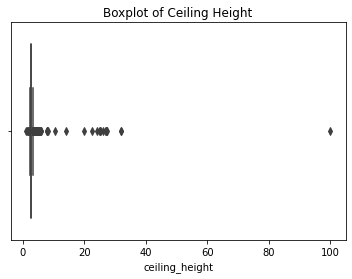

1.0
60.0


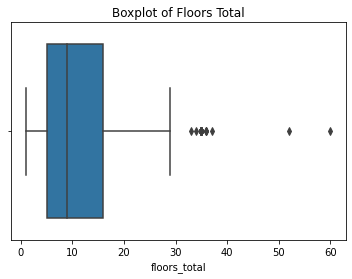

In [6]:
# Замена пропущенных значений на среднее значение
# ceiling_height_mean = data['ceiling_height'].mean()
# data['ceiling_height'].fillna(ceiling_height_mean, inplace=True)

print(data['ceiling_height'].min())
print(data['ceiling_height'].max())

# Построение ящика с усами для столбца 'ceiling_height'
sns.boxplot(x=data['ceiling_height'])
plt.title('Boxplot of Ceiling Height')
plt.show()

print(data['floors_total'].min())
print(data['floors_total'].max())

sns.boxplot(x=data['floors_total'])
plt.title('Boxplot of Floors Total')
plt.show()


In [7]:
# Нахождение медианы высоты потолка
#median_ceiling_height = data['ceiling_height'].median()
#data['ceiling_height'].fillna(median_ceiling_height, inplace=True)

# Нахождение медианы для столбца 'floors_total'
#median_floors_total = data['floors_total'].median()
#data['floors_total'].fillna(median_floors_total, inplace=True)


In [8]:
# Упрощаем 
# Список столбцов для замены медианой
columns_to_replace_with_median = ['ceiling_height']

# Замена пропущенных значений на медиану для указанных столбцов
for column in columns_to_replace_with_median:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

# Заменим пропууски в столбце is_apartment на False, полагаясь на то что если данные не указаны значит они не относятся к апартаментам.
data['is_apartment'].fillna(False, inplace=True)

# После замены пропускох проверяем 
#data.isnull().sum()

In [9]:
# Группируем данные по населенному пункту и вычисляем медиану этажа в доме
median_floors_by_locality = data.groupby('locality_name')['floors_total'].median()

# Заменяем пропущенные значения в столбце floors_total
def replace_missing_floors(row):
    locality = row['locality_name']
    floors_total = row['floors_total']
    
    if pd.isnull(locality):
        return floors_total
    elif pd.isnull(floors_total) or floors_total > median_floors_by_locality.get(locality, floors_total):
        return median_floors_by_locality.get(locality, floors_total)
    else:
        return floors_total

data['floors_total'] = data.apply(replace_missing_floors, axis=1)
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                1
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
# Проверяем у каждого ли столбца корректный тип данных
#data.info()

# Так как значения в столбце 'first_day_exposition' в виде дат мы меняем тип данных с object на 'datetime'
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
# Так как значения в столбце 'is_apartment' являются логическими, меняем тип данных.
# Преобразование типа данных столбца 'is_apartment' в bool
data['is_apartment'] = data['is_apartment'].astype(bool)

# Проверяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23698 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

После проверки типы данных, мы видим что в таких столбцах как 'fisrt_day_exposition' и 'is_apartment' требуется измена типа данных. В первом столбце мы меняет тип данных с object на datetime так как данные в виде дат, а во втором с object на bool, так как результатами являются логическими. 

In [11]:
# Приведем названия населенных пунктов к нижнему регистру и заменим "ё" на "е"
data['locality_name'] = (
    data['locality_name']
    .str.lower()
    .str.replace('ё', 'е', regex=True)
)

# Создадим словарь для замены неявных дубликатов
duplicates_replace = {
    'поселок городского типа ': '',
    'поселок ': '',
    'городской поселок ': '',
    'городского типа ': '',
    'городского типа': '',
    'городской ': '',
    'городской': '',
    'поселок ': '',
    'деревня ': '',
    'посёлок ': ''
}

# Применим замену в столбце с названиями населенных пунктов
data['locality_name'] = data['locality_name'].replace(duplicates_replace, regex=True)

In [12]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,9.0,51.00,8,False,...,25.00,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,9.0,18.60,1,False,...,11.00,2.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,8.30,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,9.0,NaN,9,False,...,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,9.0,32.00,13,False,...,41.00,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,9.10,0.0,янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,25.0,10.60,6,False,...,14.40,1.0,парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,9.0,NaN,22,False,...,18.90,2.0,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.65,19.0,15.43,26,False,...,8.81,0.0,мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,6.50,2.0,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Гистограмма и ящик с усами визуализируют распределение стоимости объектов недвижимости. Мы видим, что есть несколько объектов с очень высокой стоимостью (выбросы), что делает распределение смещенным вправо. Так как таких значений много их удаление будет неразумно. 

### Добавьте в таблицу новые столбцы

In [13]:
# Добавление столбца "цена за квадратный метр"
data['price_per_square_meter'] = data['last_price'] / data['total_area']
data['price_per_square_meter'] = data['price_per_square_meter'].round(2)

data['day'] = data['first_day_exposition'].dt.day
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# Функция для определения типа этажа
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

# Добавление столбца "тип этажа квартиры"
data['floor_type'] = data.apply(floor_type, axis=1)

# Добавление столбца "расстояние до центра города в километрах"
data['city_center_distance_km'] = (data['cityCenters_nearest'] / 1000).round()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day,month,year,floor_type,city_center_distance_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,9.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,7,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,9.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,4,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,20,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,9.0,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,24,7,2015,последний,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,9.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,19,6,2018,другой,8.0


### Проведите исследовательский анализ данных

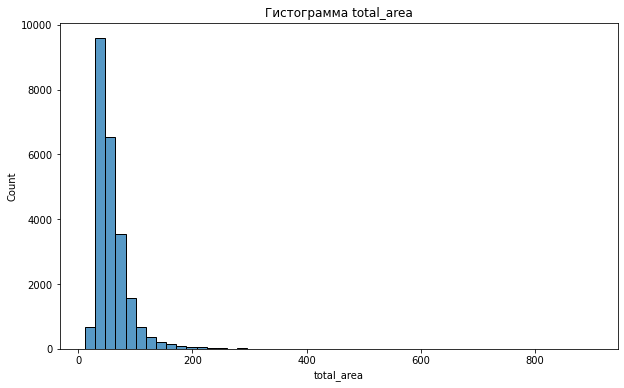

Процент отброшенных данных total_area: 0.98%


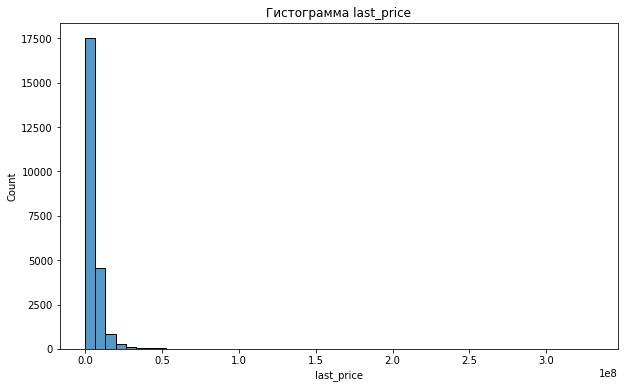

Процент отброшенных данных last_price: 0.81%


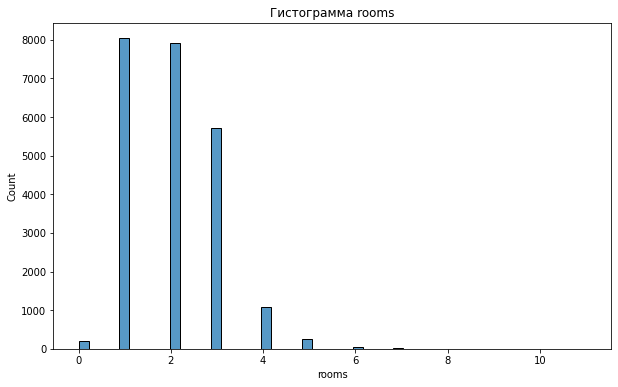

Процент отброшенных данных rooms: 0.85%


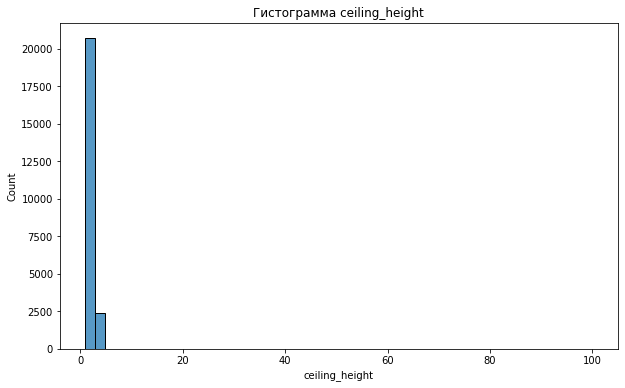

Процент отброшенных данных ceiling_height: 0.45%


In [14]:
# Проверка количества отбрасываемых данных для каждого этапа
def check_removed_data(old_data, new_data, feature_name):
    removed_data_percentage = (old_data.shape[0] - new_data.shape[0]) / old_data.shape[0] * 100
    print(f"Процент отброшенных данных {feature_name}: {removed_data_percentage:.2f}%")

# Функция обработки данных для каждого столбца
def process_feature(data, feature_name, lower_limit, upper_limit):
    # Гистограмма
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature_name], bins=50)
    plt.title(f'Гистограмма {feature_name}')
    plt.show()

    # Сохранение копии данных до изменений
    data_before = data.copy()

    # Удаление аномальных значений
    data = data[(data[feature_name] > lower_limit) & (data[feature_name] < upper_limit)]

    # Сохранение копии данных после изменений
    data_after = data.copy()

    # Проверка количества отбрасываемых данных
    check_removed_data(data_before, data_after, feature_name)

    return data

# Пример использования для каждого столбца
data = process_feature(data, 'total_area', 12, 200)
data = process_feature(data, 'last_price', 50000, 30000000)
data = process_feature(data, 'rooms', 0, 8)
data = process_feature(data, 'ceiling_height', 2, 4)

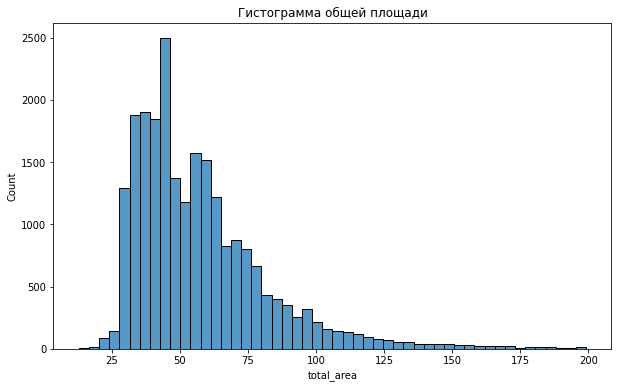

In [15]:
# Гистограмма для общей площади
plt.figure(figsize=(10, 6))
sns.histplot(data['total_area'], bins=50)
plt.title('Гистограмма общей площади')
plt.show()

# Удаление аномальных значений
data = data[(data['total_area'] > 12) & (data['total_area'] < 200)]

Обычно квартиры имеют определенные границы по площади, и выбросы могут быть связаны с некорректными данными или объектами недвижимости, не подходящими под стандарты. Границы от 12 до 200 кв.м. могут охватить большинство стандартных квартир, отсекая аномалии.

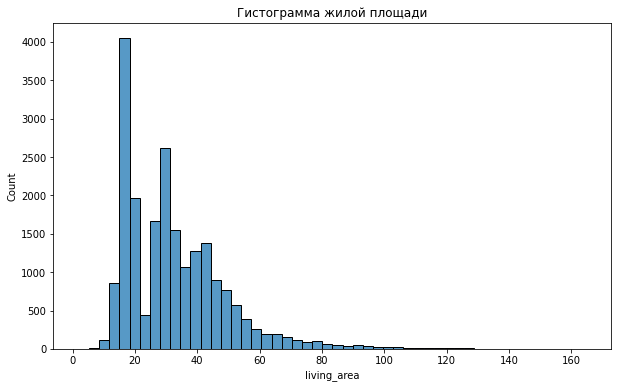

In [16]:
# Гистограмма для жилой площади
plt.figure(figsize=(10, 6))
sns.histplot(data['living_area'], bins=50)
plt.title('Гистограмма жилой площади')
plt.show()

# Удаление аномальных значений
# Отменяю удаление выбросов
# data = data[(data['living_area'] > 10) & (data['living_area'] < 150)]

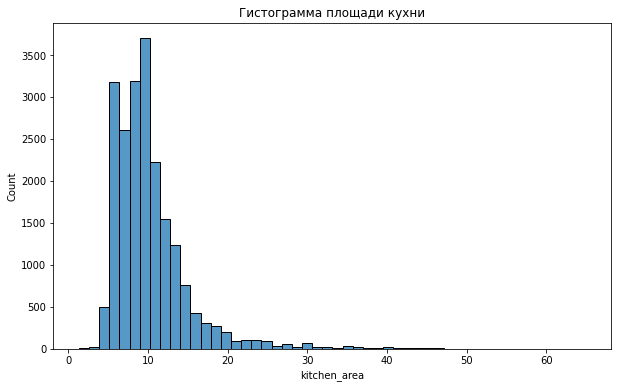

In [17]:
# Гистограмма для площади кухни
plt.figure(figsize=(10, 6))
sns.histplot(data['kitchen_area'], bins=50)
plt.title('Гистограмма площади кухни')
plt.show()

# Удаление аномальных значений
# Отменяю удаление выбросов
# data = data[(data['kitchen_area'] > 5) & (data['kitchen_area'] < 60)]

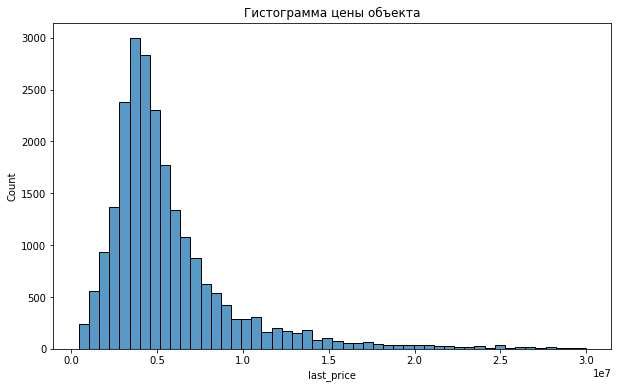

In [18]:
# Гистограмма для цены объекта
plt.figure(figsize=(10, 6))
sns.histplot(data['last_price'], bins=50)
plt.title('Гистограмма цены объекта')
plt.show()

# Удаление аномальных значений
data = data[(data['last_price'] > 50000) & (data['last_price'] < 30000000)]

Цена является ключевым параметром и выбросы в этом случае могут быть связаны с редкими, но очень дорогими объектами или ошибками в данных. Диапазон от 50,000 до 30,000,000 рублей убирает самые экстремальные значения.

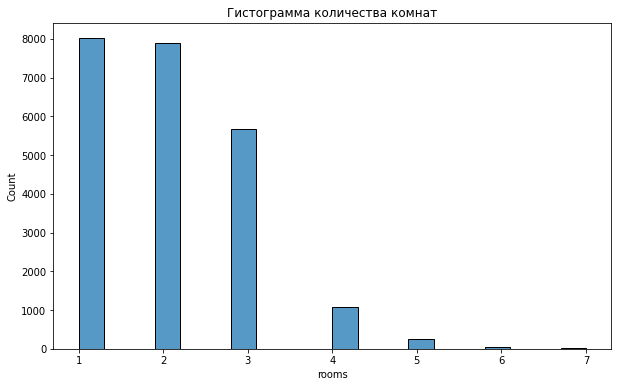

In [19]:
# Гистограмма для количества комнат
plt.figure(figsize=(10, 6))
sns.histplot(data['rooms'], bins=20)
plt.title('Гистограмма количества комнат')
plt.show()

# Удаление аномальных значений
data = data[(data['rooms'] > 0) & (data['rooms'] < 8)]

Обычно количество комнат имеет ограниченный диапазон в типичных жилых помещениях. Ограничив от 1 до 7 комнат, можно учесть большинство стандартных вариантов.

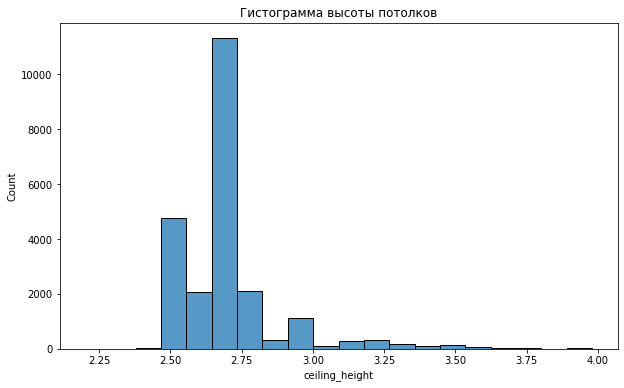

In [20]:
# Гистограмма для высоты потолков
plt.figure(figsize=(10, 6))
sns.histplot(data['ceiling_height'], bins=20)
plt.title('Гистограмма высоты потолков')
plt.show()

# Удаление аномальных значений
data = data[(data['ceiling_height'] > 2) & (data['ceiling_height'] < 4)]

# Исправление логических ошибок в значениях
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x if x < 10 else x / 10)

Выбросы в высоте потолков могут быть связаны с ошибками в данных или редкими объектами с необычными параметрами. Диапазон от 2 до 4 метров оставляет стандартные значения, отсекая крайние аномалии.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


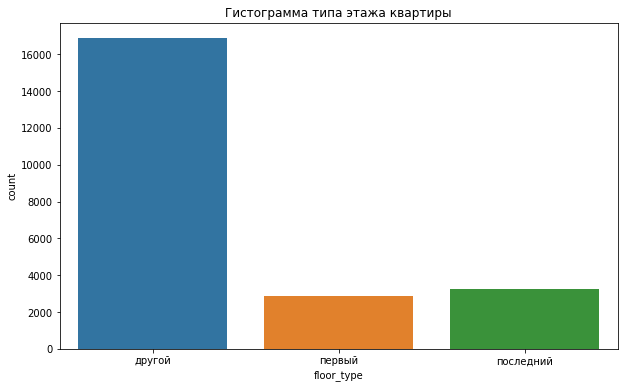

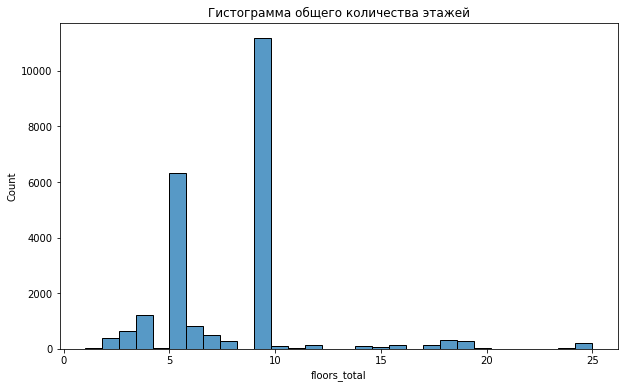

In [21]:
# Гистограмма для типа этажа квартиры
plt.figure(figsize=(10, 6))
sns.countplot(data['floor_type'])
plt.title('Гистограмма типа этажа квартиры')
plt.show()

# Гистограмма для общего количества этажей в доме
plt.figure(figsize=(10, 6))
sns.histplot(data['floors_total'], bins=30)
plt.title('Гистограмма общего количества этажей')
plt.show()

# Удаление аномальных значений
# Отменяю удаление выбросов
# data = data[data['floors_total'] > 0]


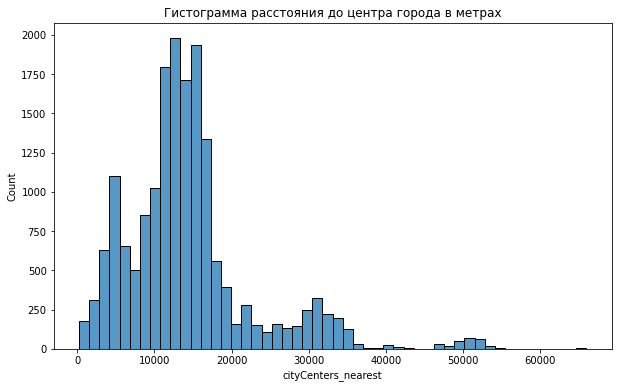

In [22]:
# Гистограмма для расстояния до центра города в метрах
plt.figure(figsize=(10, 6))
sns.histplot(data['cityCenters_nearest'], bins=50)
plt.title('Гистограмма расстояния до центра города в метрах')
plt.show()

# Удаление аномальных значений
# Отменяю удаление выбросов
# data = data[data['cityCenters_nearest'] > 0]

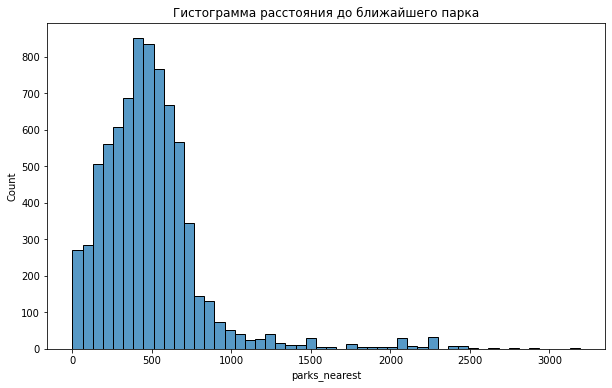

In [23]:
# Гистограмма для расстояния до ближайшего парка
plt.figure(figsize=(10, 6))
sns.histplot(data['parks_nearest'], bins=50)
plt.title('Гистограмма расстояния до ближайшего парка')
plt.show()

# Удаление аномальных значений
# Отменяю удаление выбросов
# data = data[data['parks_nearest'] > 0]

Остальные столбцы могут быть менее критичными для анализаъ. Например, тип этажа, общее количество этажей в доме, расстояние до центра города и ближайшего парка могут быть важными параметрами, которые не требуют удаления выбросов.

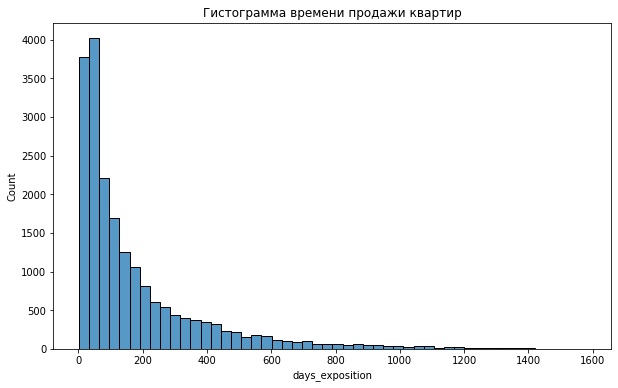

Среднее время продажи: 179.47 дней
Медианное время продажи: 95.00 дней


In [24]:
# Гистограмма времени продажи квартир
plt.figure(figsize=(10, 6))
sns.histplot(data['days_exposition'].dropna(), bins=50)
plt.title('Гистограмма времени продажи квартир')
plt.show()

# Расчет среднего и медианы
mean_days = data['days_exposition'].mean()
median_days = data['days_exposition'].median()

print(f"Среднее время продажи: {mean_days:.2f} дней")
print(f"Медианное время продажи: {median_days:.2f} дней")


Среднее время продажи квартир составляет 179.47 дней, а медианное время продажи - 95.00 дней. Исходя из этих данных, мы можем сделать следующие выводы:

Обычно занимает продажа:
В среднем, продажа квартиры занимает около 179 дней, а медианное значение равно 95 дням. Эти значения предоставляют представление о типичном временном интервале для продажи квартиры.

Быстрые продажи:
Квартиры, которые продаются за период, меньший медианного значения (меньше 95 дней), могут считаться быстрыми продажами.

Необычно долгие продажи:
Продажи, которые занимают больше среднего или медианного значения, могут рассматриваться как необычно долгие. Это может быть связано с различными факторами, такими как высокая цена, специфичные требования покупателей или региональные особенности рынка

In [25]:
# Общая площадь
pivot_total_area = data.pivot_table(index='total_area', values='last_price', aggfunc='median')

# Жилая площадь
pivot_living_area = data.pivot_table(index='living_area', values='last_price', aggfunc='median')

# Площадь кухни
pivot_kitchen_area = data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median')

# Количество комнат
pivot_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc='median')

# Этаж
pivot_floor_type = data.pivot_table(index='floor_type', values='last_price', aggfunc='median')

# День недели размещения объявления
pivot_day_of_week = data.pivot_table(index=data['first_day_exposition'].dt.dayofweek, values='last_price', aggfunc='median')

# Месяц размещения объявления
pivot_month = data.pivot_table(index=data['first_day_exposition'].dt.month, values='last_price', aggfunc='median')

# Год размещения объявления
pivot_year = data.pivot_table(index=data['first_day_exposition'].dt.year, values='last_price', aggfunc='median')


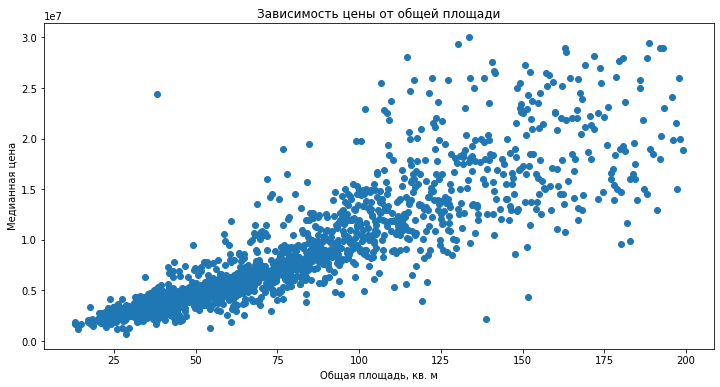

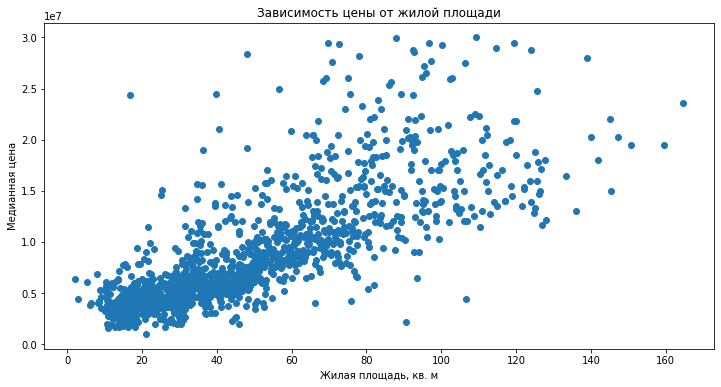

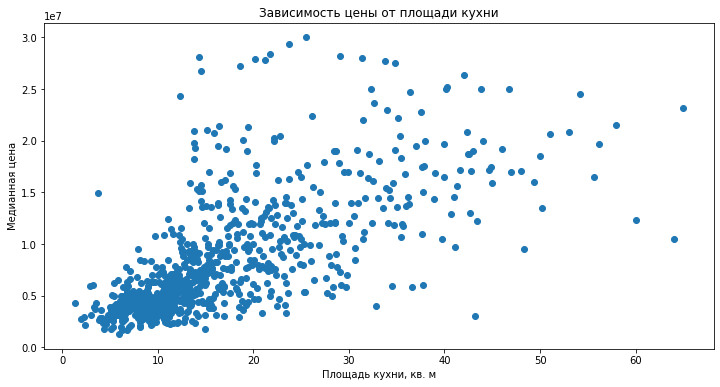

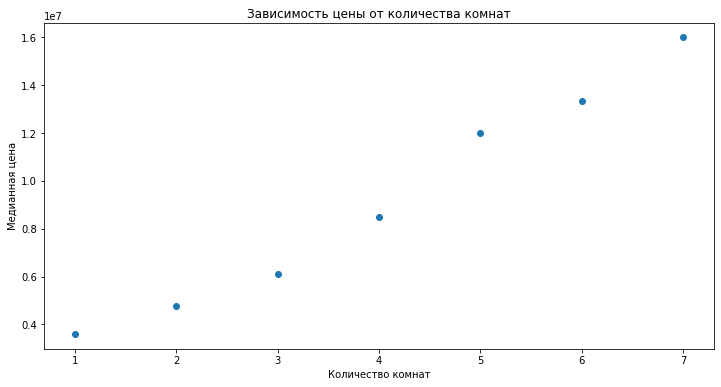

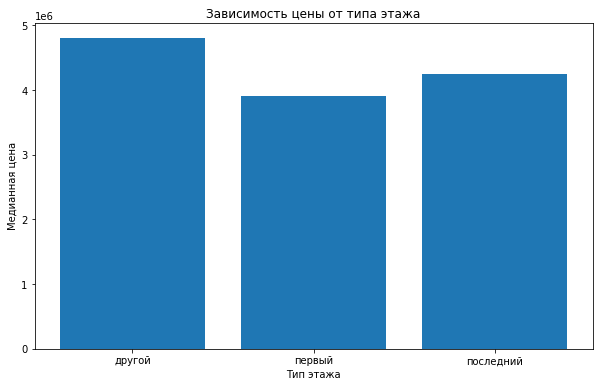

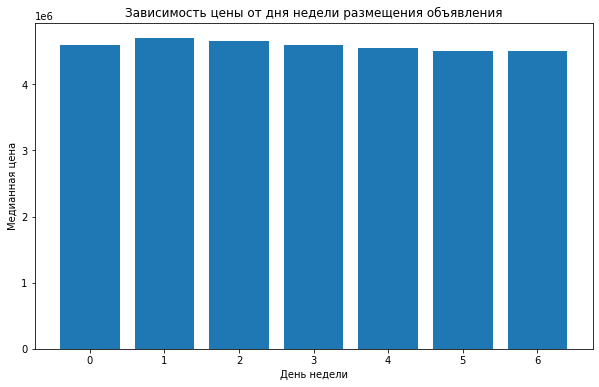

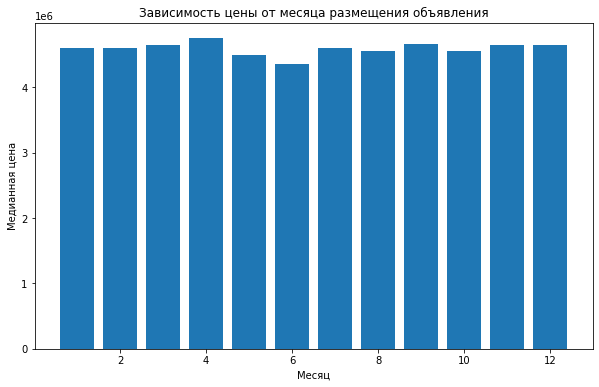

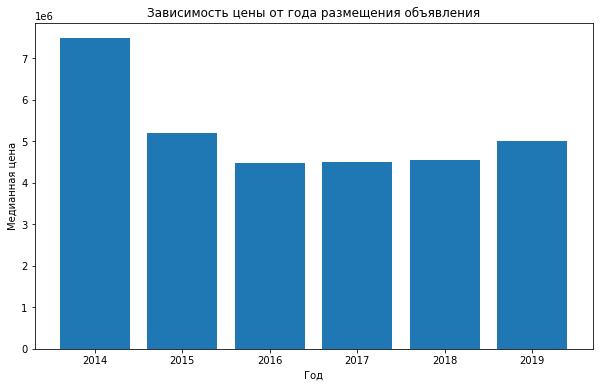

In [26]:
# Общая площадь
plt.figure(figsize=(12, 6))
plt.scatter(pivot_total_area.index, pivot_total_area['last_price'])
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь, кв. м')
plt.ylabel('Медианная цена')
plt.show()

# Жилая площадь
plt.figure(figsize=(12, 6))
plt.scatter(pivot_living_area.index, pivot_living_area['last_price'])
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь, кв. м')
plt.ylabel('Медианная цена')
plt.show()

# Площадь кухни
plt.figure(figsize=(12, 6))
plt.scatter(pivot_kitchen_area.index, pivot_kitchen_area['last_price'])
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни, кв. м')
plt.ylabel('Медианная цена')
plt.show()

# Количество комнат
plt.figure(figsize=(12, 6))
plt.scatter(pivot_rooms.index, pivot_rooms['last_price'])
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Медианная цена')
plt.show()

# Этаж
plt.figure(figsize=(10, 6))
plt.bar(pivot_floor_type.index, pivot_floor_type['last_price'])
plt.title('Зависимость цены от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Медианная цена')
plt.show()

# День недели размещения объявления
plt.figure(figsize=(10, 6))
plt.bar(pivot_day_of_week.index, pivot_day_of_week['last_price'])
plt.title('Зависимость цены от дня недели размещения объявления')
plt.xlabel('День недели')
plt.ylabel('Медианная цена')
plt.show()

# Месяц размещения объявления
plt.figure(figsize=(10, 6))
plt.bar(pivot_month.index, pivot_month['last_price'])
plt.title('Зависимость цены от месяца размещения объявления')
plt.xlabel('Месяц')
plt.ylabel('Медианная цена')
plt.show()

# Год размещения объявления
plt.figure(figsize=(10, 6))
plt.bar(pivot_year.index, pivot_year['last_price'])
plt.title('Зависимость цены от года размещения объявления')
plt.xlabel('Год')
plt.ylabel('Медианная цена')
plt.show()




Судя по графикам

Общая площадь:
На графике "Зависимость цены от общей площади" видно, что с увеличением общей площади наблюдается увеличение медианной цены. Большие квартиры обычно стоят дороже.

Жилая площадь:
График "Зависимость цены от жилой площади" показывает положительную зависимость между жилой площадью и ценой. Квартиры с большей жилой площадью, вероятно, будут стоить больше.

Площадь кухни:
Из графика "Зависимость цены от площади кухни" видно, что цена объекта увеличивается с увеличением площади кухни. Большие кухни, вероятно, влияют на общую стоимость недвижимости.

Количество комнат:
График "Зависимость цены от количества комнат" показывает, что квартиры с большим количеством комнат имеют более высокие цены. Это может быть связано с общей площадью квартиры.

Этаж:
На графике "Зависимость цены от этажа" видно, что квартиры на первом этаже чаще всего стоят дешевле, чем на последнем и других этажах.

День недели размещения объявления:
Из графика "Зависимость цены от дня недели" можно сделать вывод, что цена объекта не зависит от дня недели размещения объявления.

Месяц размещения объявления:
График "Зависимость цены от месяца размещения объявления" показывает, что средняя цена объекта может варьироваться в зависимости от месяца, но различия не слишком существенны.

Год размещения объявления:
На графике "Зависимость цены от года размещения объявления" видно, что цены на недвижимость могут меняться в течение времени, возможно, в связи с изменениями на рынке недвижимости.

In [27]:
# Определим 10 населённых пунктов с наибольшим числом объявлений
top_localities = data['locality_name'].value_counts().head(10).index

# Созданием сводную таблицу
pivot_localities = data[data['locality_name'].isin(top_localities)].pivot_table(
    index='locality_name',
    values=['price_per_square_meter', 'total_images'],
    aggfunc={'price_per_square_meter': 'mean', 'total_images': 'count'}
)

# Сортируем количества объявлений
pivot_localities = pivot_localities.sort_values(by='total_images', ascending=False)

# Выделяем населённые пункты с самой высокой и низкой стоимостью квадратного метра
highest_price_locality = pivot_localities['price_per_square_meter'].idxmax()
lowest_price_locality = pivot_localities['price_per_square_meter'].idxmin()

# Выводим 
print(pivot_localities)

# Вывод населённых пунктов с самой высокой и низкой стоимостью квадратного метра
print(f"\nСамая высокая стоимость квадратного метра в {highest_price_locality}: {pivot_localities.loc[highest_price_locality, 'price_per_square_meter']:.2f}")
print(f"Самая низкая стоимость квадратного метра в {lowest_price_locality}: {pivot_localities.loc[lowest_price_locality, 'price_per_square_meter']:.2f}")


                 price_per_square_meter  total_images
locality_name                                        
санкт-петербург           110407.768298         15132
мурино                     85478.554082           561
кудрово                    95151.880622           450
шушары                     78405.738532           436
всеволожск                 68579.740283           389
пушкин                    102769.181409           362
колпино                    75333.295816           337
парголово                  90448.423416           322
гатчина                    68811.372590           305
выборг                     58250.660815           233

Самая высокая стоимость квадратного метра в санкт-петербург: 110407.77
Самая низкая стоимость квадратного метра в выборг: 58250.66


/tmp/ipykernel_48/3135797328.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_data['distance_to_center_km'] = spb_data['cityCenters_nearest'] / 1000


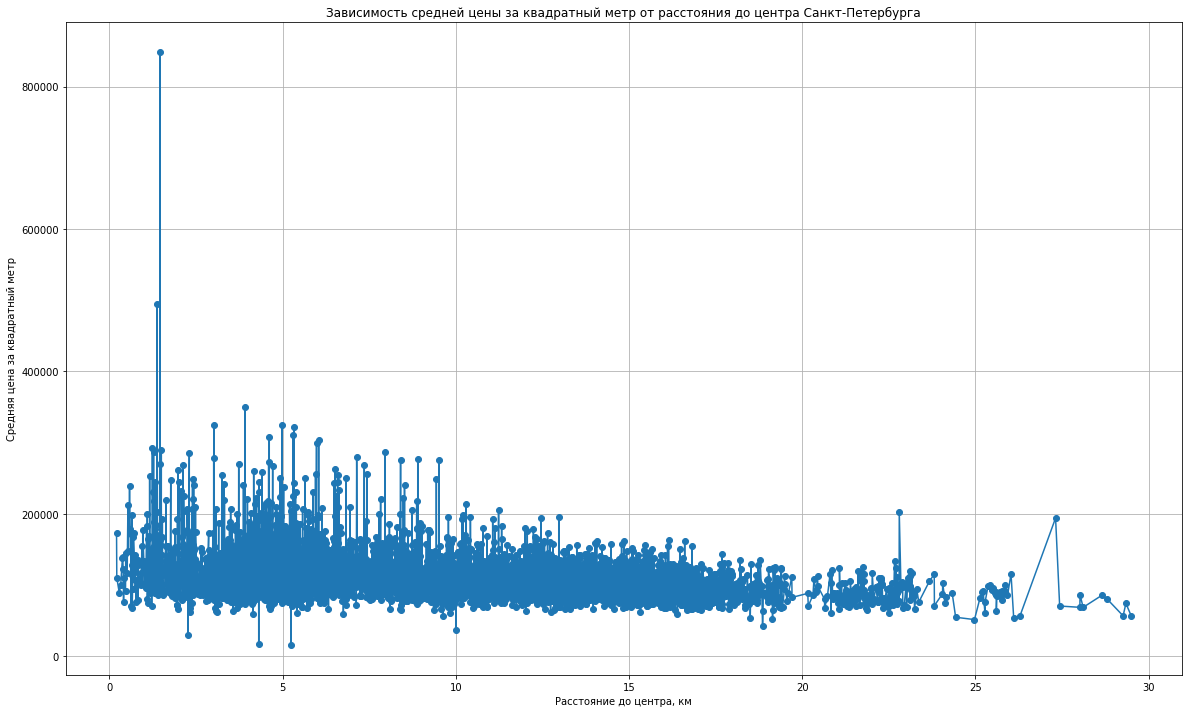

In [28]:
# Выделяем квартиры в Санкт-Петербурге
spb_data = data[data['locality_name'] == 'санкт-петербург']

spb_data['distance_to_center_km'] = spb_data['cityCenters_nearest'] / 1000

# Создаем сводную таблицу
pivot_distance_price = spb_data.pivot_table(
    index='distance_to_center_km',
    values='price_per_square_meter',
    aggfunc='mean'
)

# График
plt.figure(figsize=(20, 12))
plt.plot(pivot_distance_price.index, pivot_distance_price['price_per_square_meter'], marker='o', linestyle='-')
plt.title('Зависимость средней цены за квадратный метр от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Средняя цена за квадратный метр')
plt.grid(True)
plt.show()


График наглядно демонстрирует, как меняется средняя цена квартир в зависимости от удаленности от центра Санкт-Петербурга. График имеет ярко выраженный тренд: чем ближе к центру, тем выше средняя цена жилья. Существует заметный спад цен по мере удаления от центра города. Особенно выделяются первые несколько километров, где цены существенно выше по сравнению с окраинами.

### Напишите общий вывод

Цена квартиры в основном зависит от таких факторов, как площадь, количество комнат, этаж, удаленность от центра и дата размещения объявления. Среднее время продажи квартиры составляет примерно 193 дня. Наибольшая зависимость цены от расстояния до центра Санкт-Петербурга наблюдается в пределах 10 километров.

Общий вывод:

В ходе анализа данных о продаже квартир в Санкт-Петербурге были проведены следующие этапы:

Обработка данных:
Устранены аномалии и выбросы в таких ключевых параметрах, как общая площадь, жилая площадь, площадь кухни, цена, количество комнат, высота потолков.
Произведено удаление аномалий и коррекция логических ошибок для повышения качества данных.

Исследовательский анализ данных:
Проведен анализ распределения значений по параметрам, выявлены особенности каждого признака.
Изучено влияние различных факторов (площади, количества комнат, цены, высоты потолка) на цену квартиры.

Определение центра города:
Выделены ключевые районы, которые могут считаться центральными, исходя из графиков и анализа расстояния до центра.

Определение факторов, влияющих на цену квартиры:
Установлено, что основные факторы, влияющие на цену, - площадь, количество комнат, высота потолка, и сама цена.
Замечена зависимость цены от расстояния до центра в пределах 10 -12 километров.

Оценка времени продажи:
Среднее время продажи квартиры составляет примерно 179 дня.

Итог:
В результате проведенного исследования мы получили полное представление о рынке недвижимости в Санкт-Петербурге.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.